In [1]:
import pandas as pd
from utils import gen_df_filt
from utils import gen_group_week, gen_group_year, gen_totals
from utils import process_developers, bar_developers, bar_rank_repos

### Commits

In [2]:
df_commits_bittensor = pd.read_json('datasets/bittensor_commits.json')
df_commits_fetchai = pd.read_json('datasets/fetchai_commits.json')
df_commits_numerai = pd.read_json('datasets/numerai_commits.json')
df_commits_ocean = pd.read_json('datasets/oceanprotocol_commits.json')
df_commits_oraichain = pd.read_json('datasets/oraichain_commits.json')
df_commits_singular = pd.read_json('datasets/singularitynet_commits.json')

In [3]:
df_commits_bittensor_filt = gen_df_filt(df_commits_bittensor)
df_commits_fetchai_filt = gen_df_filt(df_commits_fetchai)
df_commits_numerai_filt = gen_df_filt(df_commits_numerai)
df_commits_ocean_filt = gen_df_filt(df_commits_ocean)
df_commits_oraichain_filt = gen_df_filt(df_commits_oraichain)
df_commits_singular_filt = gen_df_filt(df_commits_singular)

### Repos

In [4]:
df_repos_bittensor = pd.read_json('datasets/bittensor_repos.json').rename(columns={'name':'repo'})[['repo', 'html_url']]
df_repos_fetchai = pd.read_json('datasets/fetchai_repos.json').rename(columns={'name':'repo'})[['repo', 'html_url']]
df_repos_numerai = pd.read_json('datasets/numerai_repos.json').rename(columns={'name':'repo'})[['repo', 'html_url']]
df_repos_ocean = pd.read_json('datasets/oceanprotocol_repos.json').rename(columns={'name':'repo'})[['repo', 'html_url']]
df_repos_oraichain = pd.read_json('datasets/oraichain_repos.json').rename(columns={'name':'repo'})[['repo', 'html_url']]
df_repos_singular = pd.read_json('datasets/singularitynet_repos.json').rename(columns={'name':'repo'})[['repo', 'html_url']]

### Dataframes by Repository (with commits dataframes)

In [5]:
df_bittensor_repos_filt = df_commits_bittensor_filt.groupby('repo').agg({'sha':'count'}).rename(columns={'sha':'count'}).reset_index().sort_values(by='count', ascending=False)
df_fetchai_repos_filt = df_commits_fetchai_filt.groupby('repo').agg({'sha':'count'}).rename(columns={'sha':'count'}).reset_index().sort_values(by='count', ascending=False)
df_numerai_repos_filt = df_commits_numerai_filt.groupby('repo').agg({'sha':'count'}).rename(columns={'sha':'count'}).reset_index().sort_values(by='count', ascending=False)
df_ocean_repos_filt = df_commits_ocean_filt.groupby('repo').agg({'sha':'count'}).rename(columns={'sha':'count'}).reset_index().sort_values(by='count', ascending=False)
df_oraichain_repos_filt = df_commits_oraichain_filt.groupby('repo').agg({'sha':'count'}).rename(columns={'sha':'count'}).reset_index().sort_values(by='count', ascending=False)
df_singular_repos_filt = df_commits_singular_filt.groupby('repo').agg({'sha':'count'}).rename(columns={'sha':'count'}).reset_index().sort_values(by='count', ascending=False)

### Merge dataframes

In [6]:
df_bittensor_repos_merged = pd.merge(df_bittensor_repos_filt, df_repos_bittensor, on='repo', how='left')
df_fetchai_repos_merged = pd.merge(df_fetchai_repos_filt, df_repos_fetchai, on='repo', how='left')
df_numerai_repos_merged = pd.merge(df_numerai_repos_filt, df_repos_numerai, on='repo', how='left')
df_ocean_repos_merged = pd.merge(df_ocean_repos_filt, df_repos_ocean, on='repo', how='left')
df_oraichain_repos_merged = pd.merge(df_oraichain_repos_filt, df_repos_oraichain, on='repo', how='left')
df_singular_repos_merged = pd.merge(df_singular_repos_filt, df_repos_singular, on='repo', how='left')

### Bittensor

In [7]:
df_bittensor_repos_merged.repo.value_counts().sum()

31

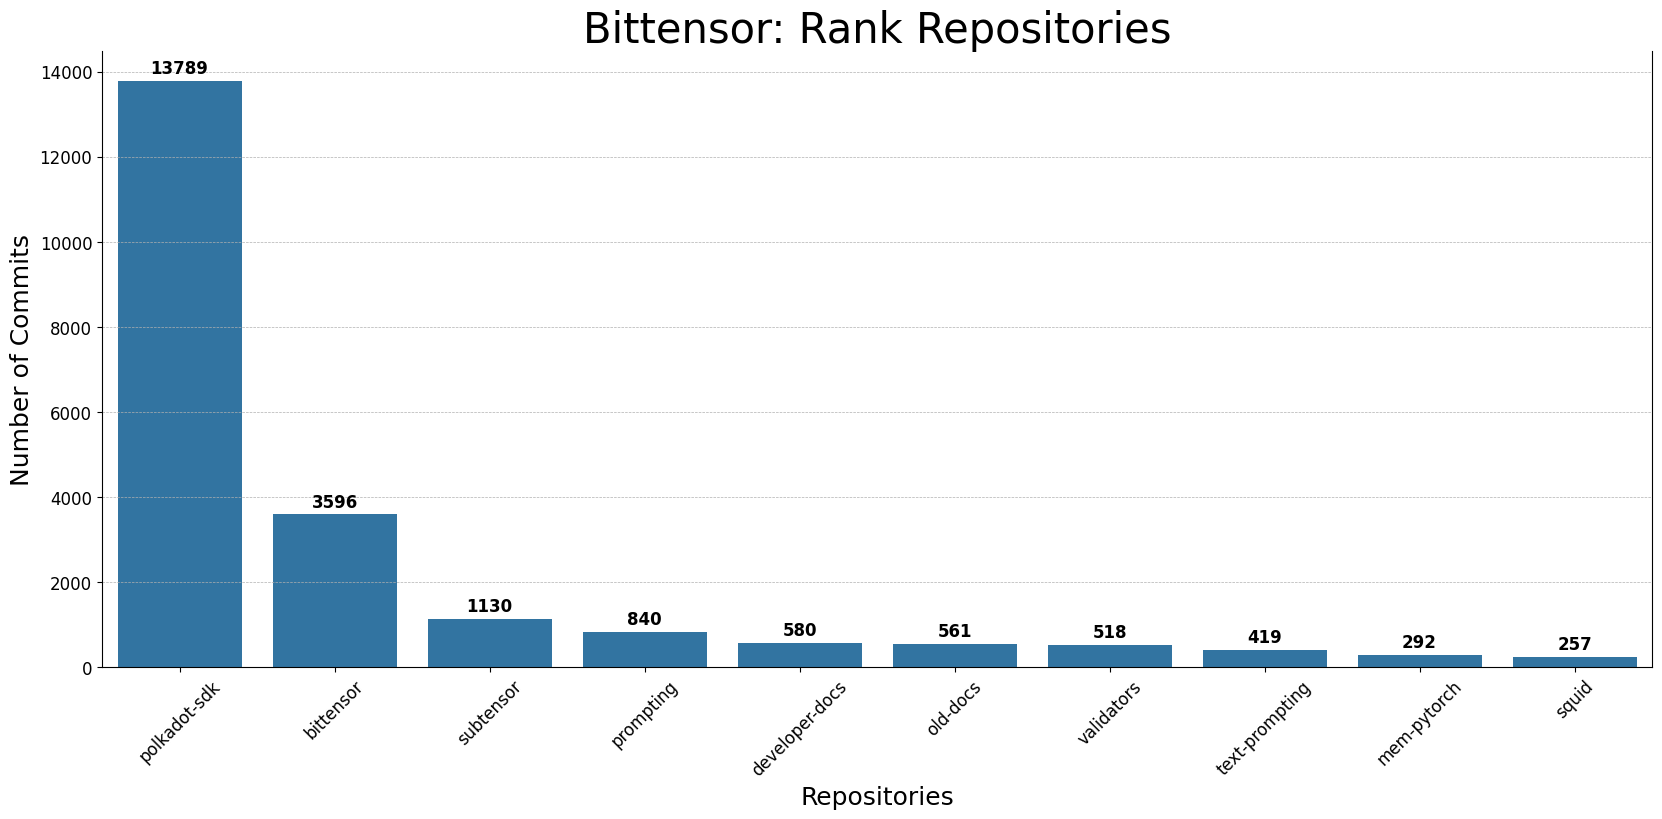

In [8]:
bar_rank_repos(df_bittensor_repos_merged, 'Bittensor', True)

In [9]:
for i, row in df_bittensor_repos_merged.head(10).iterrows():
    print(f"{row.repo}: {row.html_url}")

polkadot-sdk: https://github.com/opentensor/polkadot-sdk
bittensor: https://github.com/opentensor/bittensor
subtensor: https://github.com/opentensor/subtensor
prompting: https://github.com/opentensor/prompting
developer-docs: https://github.com/opentensor/developer-docs
old-docs: https://github.com/opentensor/old-docs
validators: https://github.com/opentensor/validators
text-prompting: https://github.com/opentensor/text-prompting
mem-pytorch: https://github.com/opentensor/mem-pytorch
squid: https://github.com/opentensor/squid


### Fetch.ai

In [10]:
df_fetchai_repos_merged.repo.value_counts().sum()

57

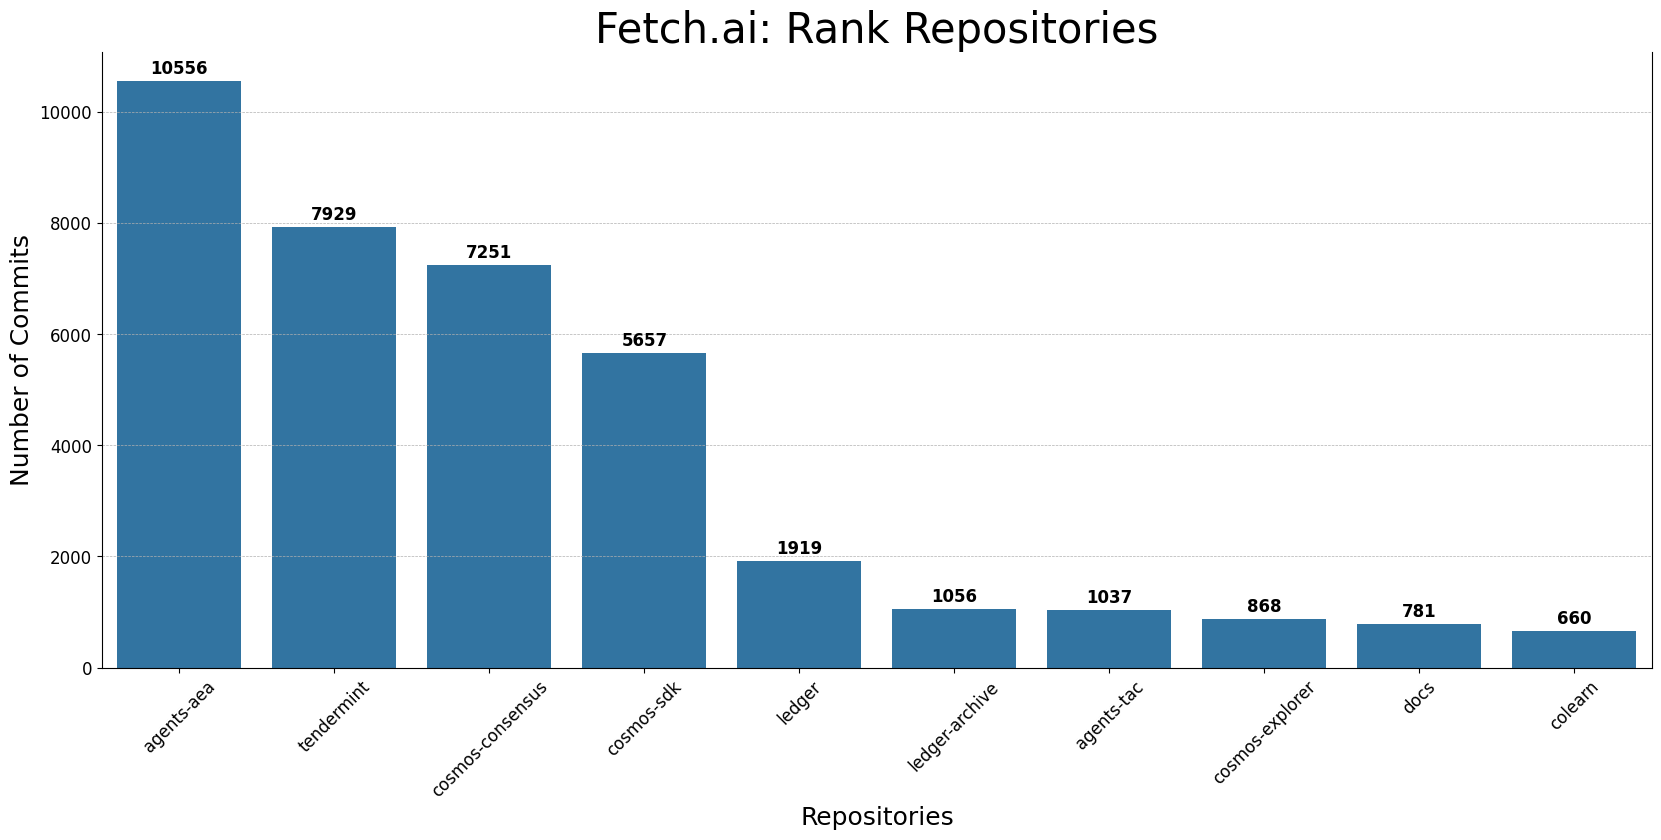

In [11]:
bar_rank_repos(df_fetchai_repos_merged, 'Fetch.ai')

In [12]:
for i, row in df_fetchai_repos_merged.head(10).iterrows():
    print(f"{row.repo}: {row.html_url}")

agents-aea: https://github.com/fetchai/agents-aea
tendermint: https://github.com/fetchai/tendermint
cosmos-consensus: https://github.com/fetchai/cosmos-consensus
cosmos-sdk: https://github.com/fetchai/cosmos-sdk
ledger: https://github.com/fetchai/ledger
ledger-archive: https://github.com/fetchai/ledger-archive
agents-tac: https://github.com/fetchai/agents-tac
cosmos-explorer: https://github.com/fetchai/cosmos-explorer
docs: https://github.com/fetchai/docs
colearn: https://github.com/fetchai/colearn


### Numer.ai

In [13]:
df_numerai_repos_merged.repo.value_counts().sum()

21

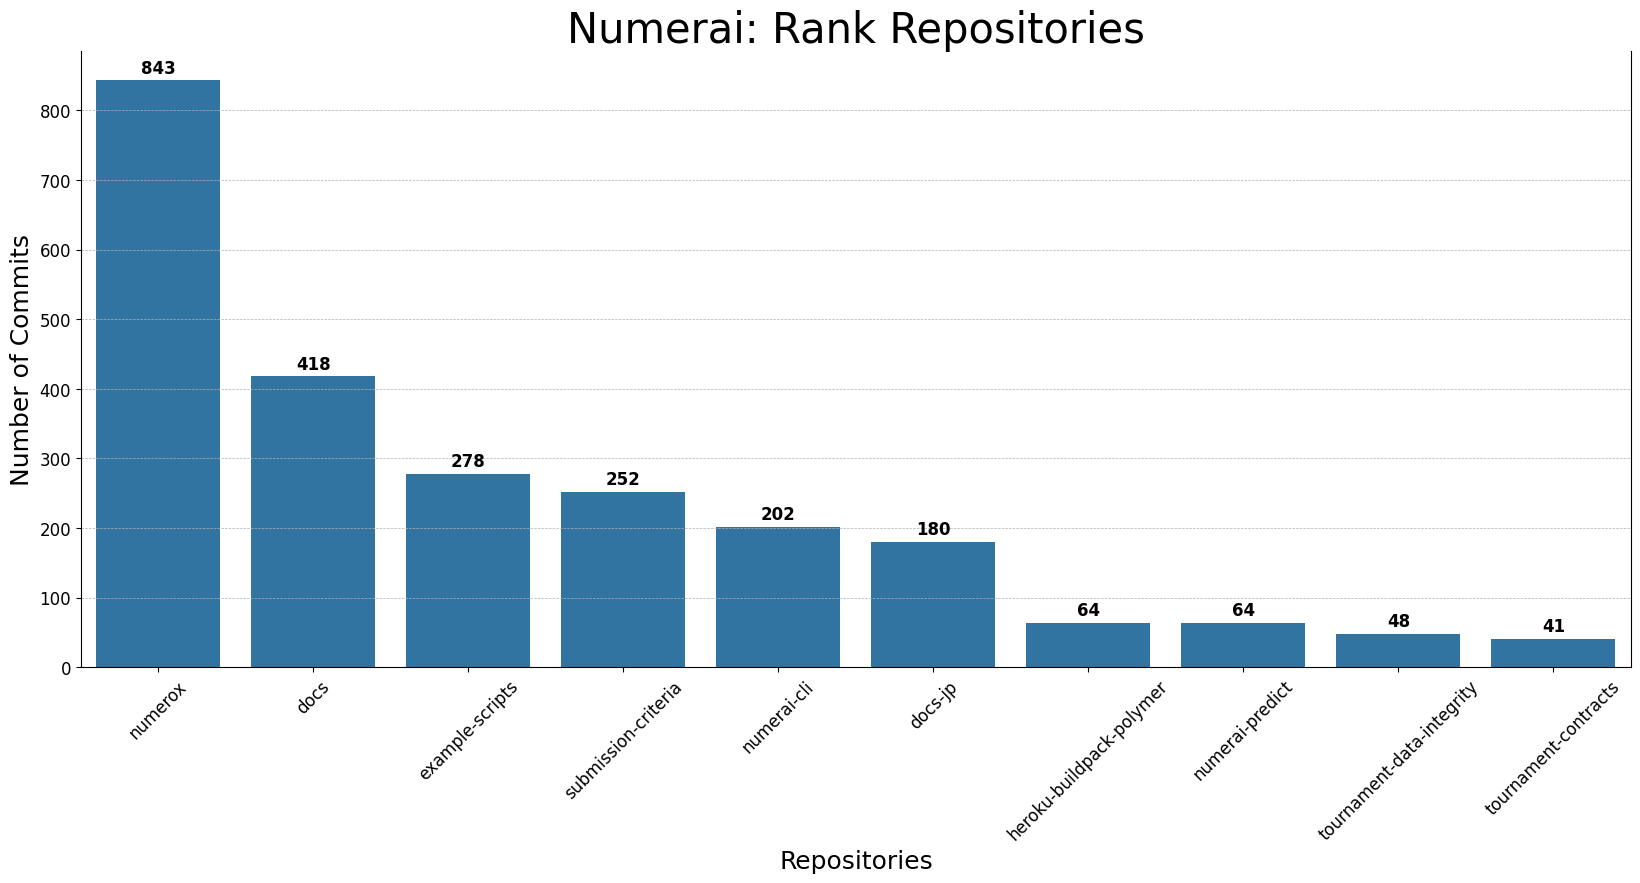

In [25]:
bar_rank_repos(df_numerai_repos_merged, 'Numerai')

In [15]:
for i, row in df_numerai_repos_merged.head(10).iterrows():
    print(f"{row.repo}: {row.html_url}")

numerox: https://github.com/numerai/numerox
docs: https://github.com/numerai/docs
example-scripts: https://github.com/numerai/example-scripts
submission-criteria: https://github.com/numerai/submission-criteria
numerai-cli: https://github.com/numerai/numerai-cli
docs-jp: https://github.com/numerai/docs-jp
heroku-buildpack-polymer: https://github.com/numerai/heroku-buildpack-polymer
numerai-predict: https://github.com/numerai/numerai-predict
tournament-data-integrity: https://github.com/numerai/tournament-data-integrity
tournament-contracts: https://github.com/numerai/tournament-contracts


### Ocean Protocol

In [16]:
df_ocean_repos_merged.repo.value_counts().sum()

79

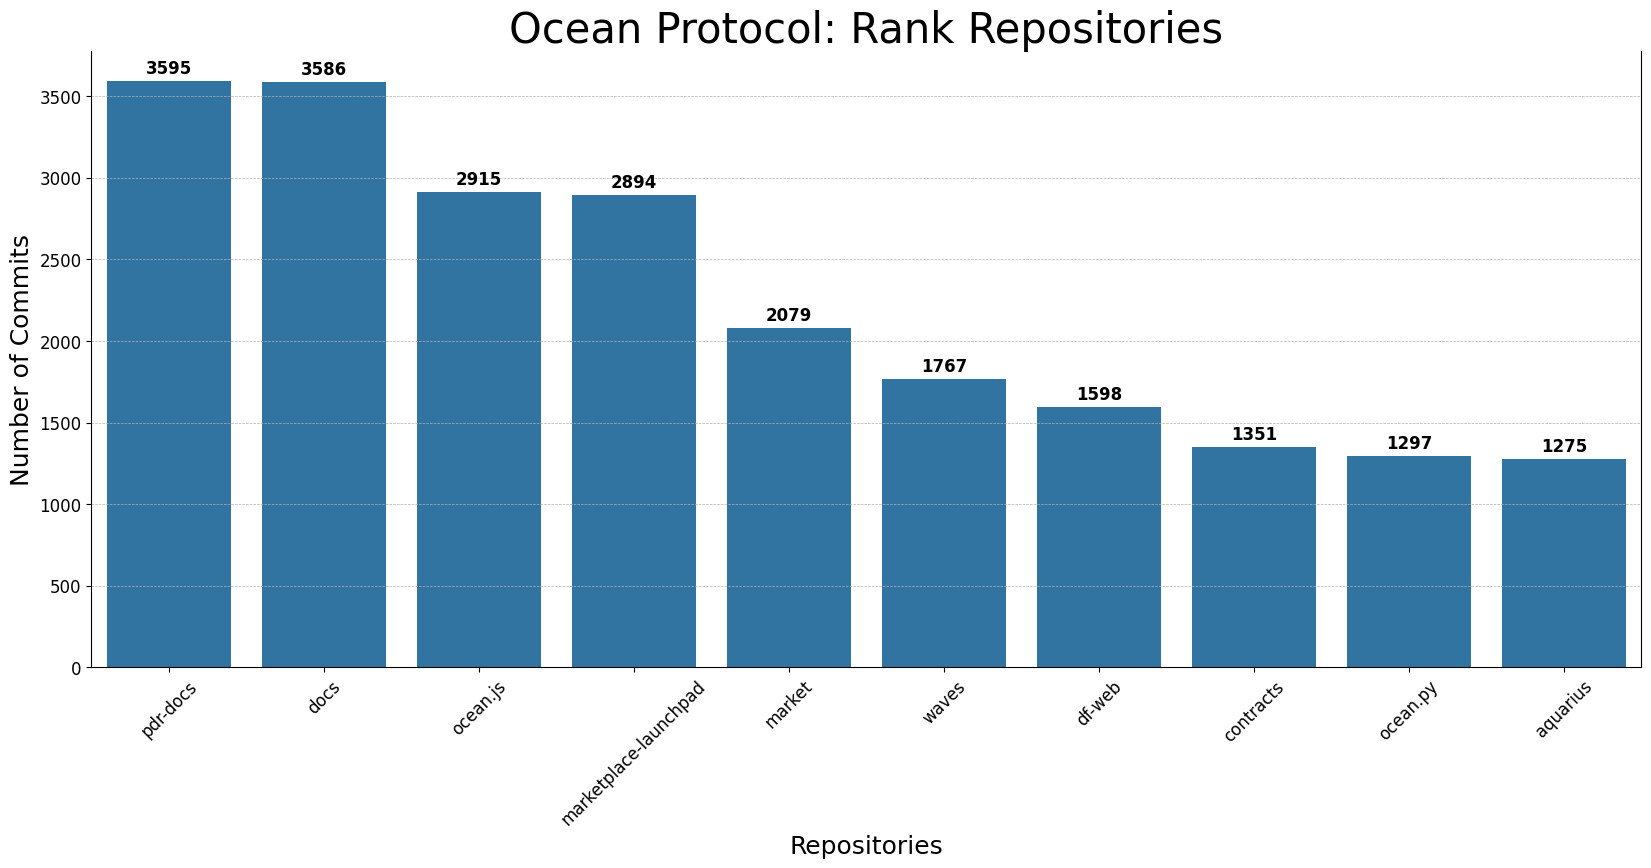

In [17]:
bar_rank_repos(df_ocean_repos_merged, 'Ocean Protocol')

In [18]:
for i, row in df_ocean_repos_merged.head(10).iterrows():
    print(f"{row.repo}: {row.html_url}")

pdr-docs: https://github.com/oceanprotocol/pdr-docs
docs: https://github.com/oceanprotocol/docs
ocean.js: https://github.com/oceanprotocol/ocean.js
marketplace-launchpad: https://github.com/oceanprotocol/marketplace-launchpad
market: https://github.com/oceanprotocol/market
waves: https://github.com/oceanprotocol/waves
df-web: https://github.com/oceanprotocol/df-web
contracts: https://github.com/oceanprotocol/contracts
ocean.py: https://github.com/oceanprotocol/ocean.py
aquarius: https://github.com/oceanprotocol/aquarius


### Oraichain

In [19]:
df_oraichain_repos_merged.repo.value_counts().sum()

109

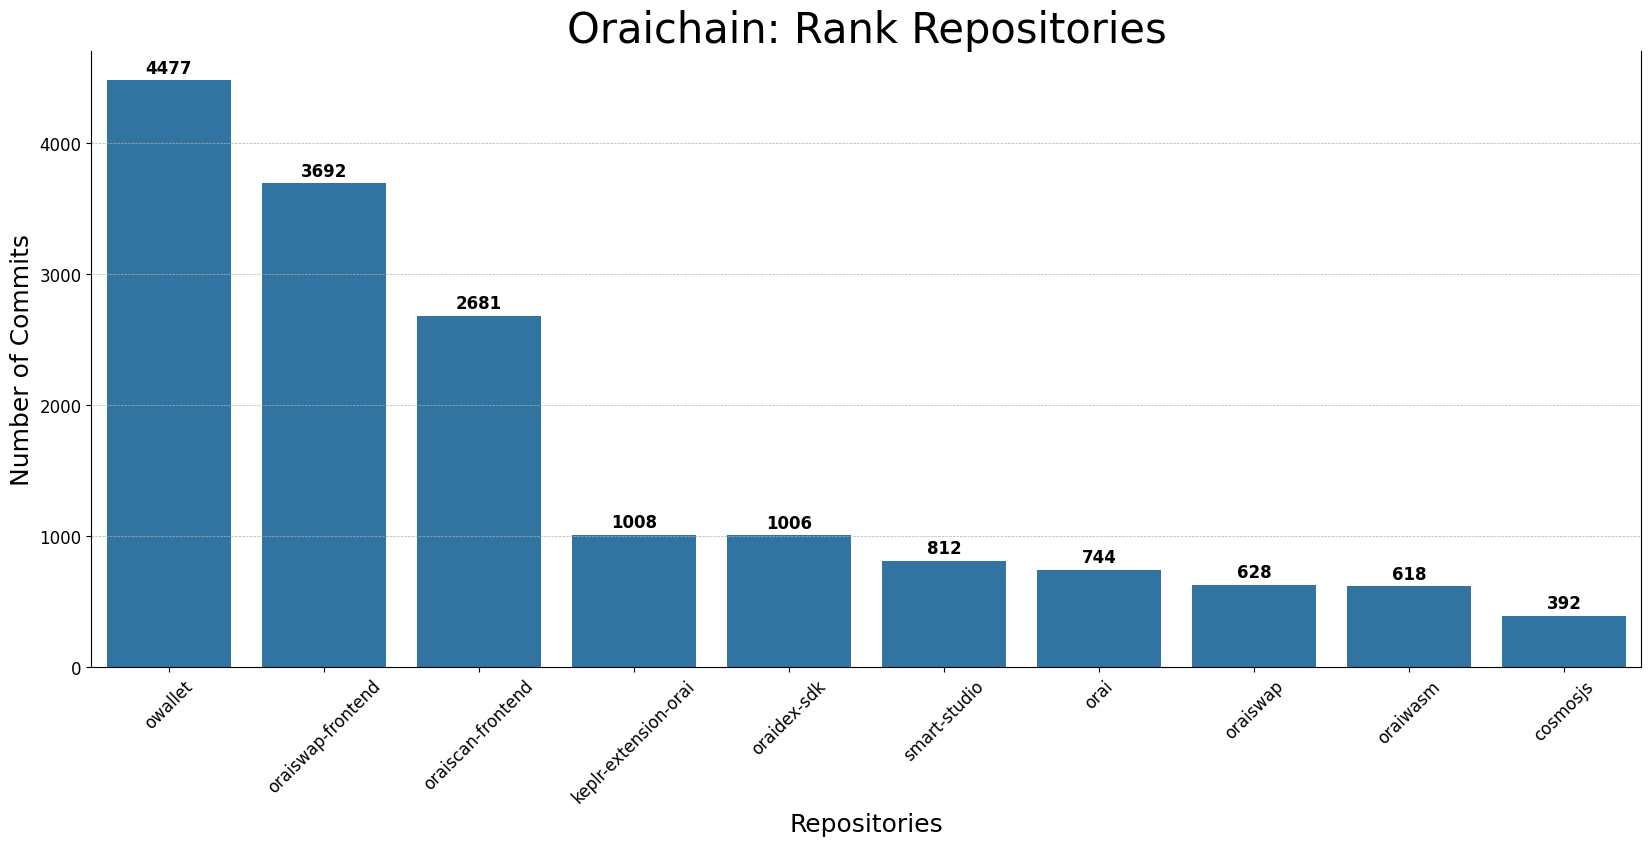

In [20]:
bar_rank_repos(df_oraichain_repos_merged, 'Oraichain')

In [21]:
for i, row in df_oraichain_repos_merged.head(10).iterrows():
    print(f"{row.repo}: {row.html_url}")

owallet: https://github.com/oraichain/owallet
oraiswap-frontend: https://github.com/oraichain/oraiswap-frontend
oraiscan-frontend: https://github.com/oraichain/oraiscan-frontend
keplr-extension-orai: https://github.com/oraichain/keplr-extension-orai
oraidex-sdk: https://github.com/oraichain/oraidex-sdk
smart-studio: https://github.com/oraichain/smart-studio
orai: https://github.com/oraichain/orai
oraiswap: https://github.com/oraichain/oraiswap
oraiwasm: https://github.com/oraichain/oraiwasm
cosmosjs: https://github.com/oraichain/cosmosjs


### SingularityNET

In [22]:
df_singular_repos_merged.repo.value_counts().sum()

116

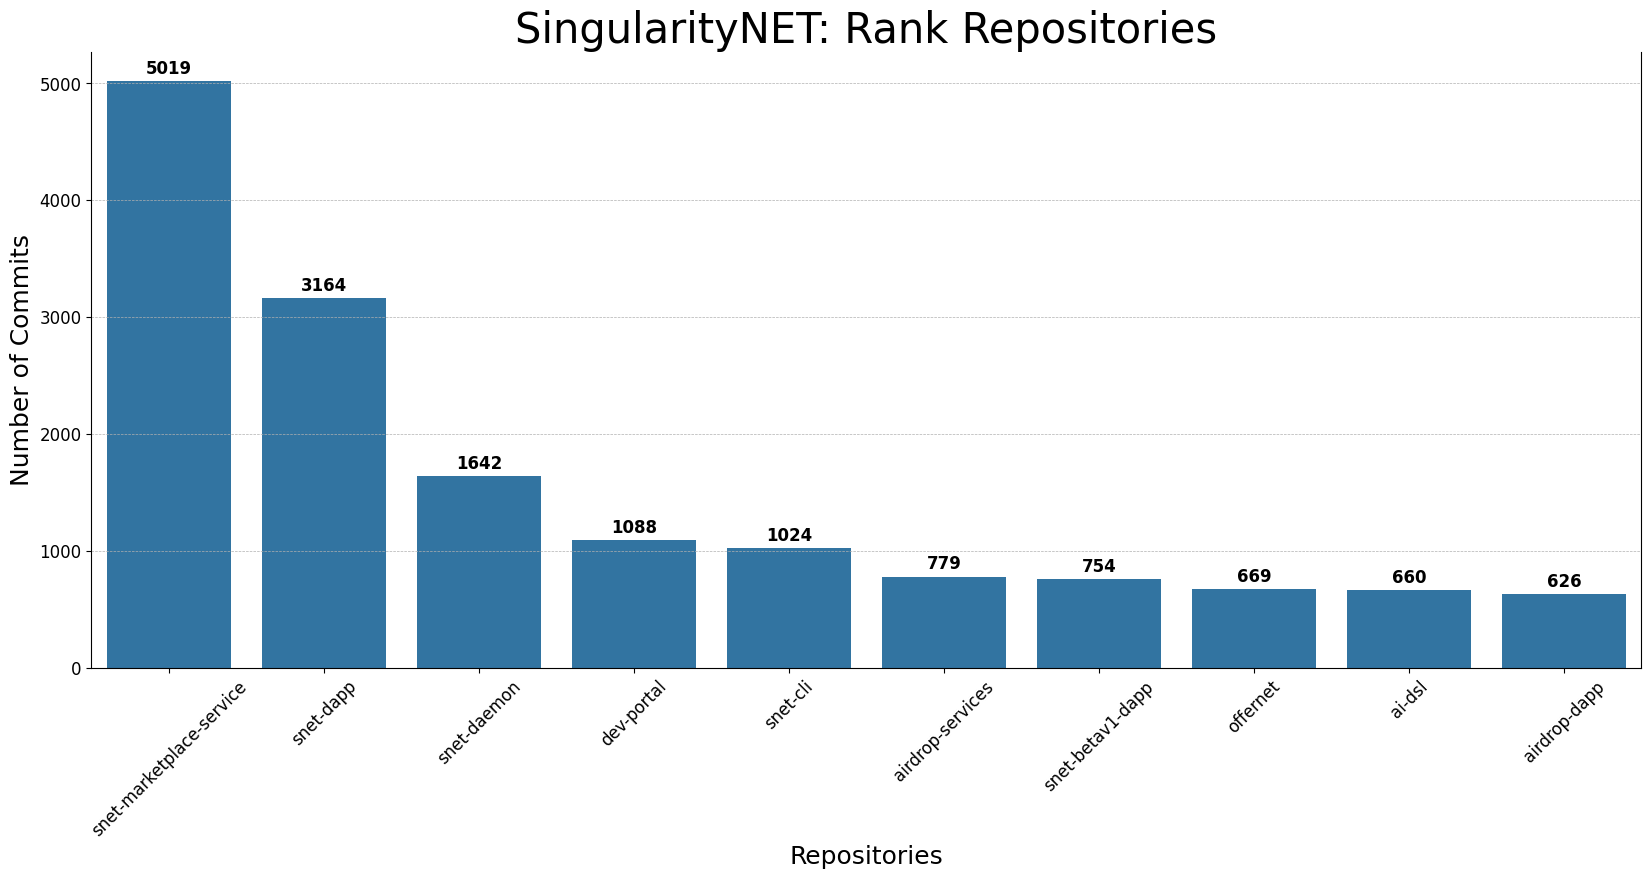

In [23]:
bar_rank_repos(df_singular_repos_merged, 'SingularityNET')

In [24]:
for i, row in df_singular_repos_merged.head(10).iterrows():
    print(f"{row.repo}: {row.html_url}")

snet-marketplace-service: https://github.com/singnet/snet-marketplace-service
snet-dapp: https://github.com/singnet/snet-dapp
snet-daemon: https://github.com/singnet/snet-daemon
dev-portal: https://github.com/singnet/dev-portal
snet-cli: https://github.com/singnet/snet-cli
airdrop-services: https://github.com/singnet/airdrop-services
snet-betav1-dapp: https://github.com/singnet/snet-betav1-dapp
offernet: https://github.com/singnet/offernet
ai-dsl: https://github.com/singnet/ai-dsl
airdrop-dapp: https://github.com/singnet/airdrop-dapp
